# TP1 de MCS

In [380]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from random import randrange
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn

## Partie I

In [136]:
def DTW(w0, w1, w2, seq1, seq2, d):
    I, J = seq2.shape[0], seq1.shape[0]
    g = np.empty((I+1,J+1))
    g.fill(None)

    g[0][0] = 0


    for j in range(1,J+1):
        g[0][j] = np.Infinity

    for i in range(1,I+1):
        g[i][0] = np.Infinity
        for j in range(1,J+1):
            g[i][j] = min(g[i-1][j]+d(seq2[i-1],seq1[j-1])*w0, g[i-1][j-1]+d(seq2[i-1],seq1[j-1])*w1, g[i][j-1]+d(seq2[i-1],seq1[j-1])*w2)


#     print(g)
    score = g[I][J]/(I+J)
#     print(f'score: {score}')

    return score 

Définition des fonctions de distance

In [3]:
D = {('X', 'X'): 0, ('X', 'C'): 1, ('X', 'U'): 1, ('X', 'U_X'): 1, ('X', 'V'): 2,
     ('C', 'X'): 1, ('C', 'C'): 0, ('C', 'U'): 1, ('C', 'U_X'): 1, ('C', 'V'): 2, 
     ('U', 'X'): 1, ('U', 'C'): 1, ('U', 'U'): 0, ('U', 'U_X'): 1, ('U', 'V'): 1, 
     ('U_X', 'X'): 1, ('U_X', 'C'): 1, ('U_X', 'U'): 1, ('U_X', 'U_X'): 0, ('U_X', 'V'): 2,
     ('V', 'X'): 2, ('V', 'C'): 2, ('V', 'U'): 1, ('V', 'U_X'): 2, ('V', 'V'): 0}


vect = lambda i, j: np.linalg.norm(i-j)
absolue = lambda i, j: abs(i-j)
euclidienne = lambda i, j: sqrt(i**2 + j**2)
adn = lambda i, j: i!=j
son = lambda i, j: D[(i,j)]

Test avec l'exemple du cours



In [69]:
seq1 = np.array([1,0,2,3])
seq2 = np.array([-1,1,0])

DTW(1, 1, 1, seq1, seq2, vect)

[[ 0. inf inf inf inf]
 [inf  2.  3.  6. 10.]
 [inf  2.  3.  4.  6.]
 [inf  3.  2.  4.  7.]]


1.0

Test avec l'exemple de l'exercice **2.1**

In [5]:
seq1 = np.array([-2,10,-10,15,-13,20,-5,14,2])
seq2 = np.array([3,-13,14,-7,9,-2])

DTW(1, 1, 1, seq1, seq2, vect)

[[  0.  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf   5.  12.  25.  37.  53.  70.  78.  89.  90.]
 [ inf  16.  28.  15.  43.  37.  70.  78. 105. 104.]
 [ inf  32.  20.  39.  16.  43.  43.  62.  62.  74.]
 [ inf  37.  37.  23.  38.  22.  49.  45.  66.  71.]
 [ inf  48.  38.  42.  29.  44.  33.  47.  50.  57.]
 [ inf  48.  50.  46.  46.  40.  55.  36.  52.  54.]]
score: 3.6


3.6

Test avec l'exemple de l'exercice **2.2**

In [6]:
seq1 = np.array(['A','T','G','G','T','A','C','G','T','C'])
seq2 = np.array(['A','A','G','T','A','G','G','C'])

DTW(1, 1, 1, seq2, seq1, adn)

[[ 0. inf inf inf inf inf inf inf inf]
 [inf  0.  0.  1.  2.  2.  3.  4.  5.]
 [inf  1.  1.  1.  1.  2.  3.  4.  5.]
 [inf  2.  2.  1.  2.  2.  2.  2.  3.]
 [inf  3.  3.  1.  2.  3.  2.  2.  3.]
 [inf  4.  4.  2.  1.  2.  3.  3.  3.]
 [inf  4.  4.  3.  2.  1.  2.  3.  4.]
 [inf  5.  5.  4.  3.  2.  2.  3.  3.]
 [inf  6.  6.  4.  4.  3.  2.  2.  3.]
 [inf  7.  7.  5.  4.  4.  3.  3.  3.]
 [inf  8.  8.  6.  5.  5.  4.  4.  3.]]
score: 0.16666666666666666


0.16666666666666666

Test avec l'exemple de l'exercice **2.3**

In [7]:
cinq, vingt, cent = np.array("X V V C X".split()), np.array("U_X V V".split()), np.array("X V V".split())

*Question 1.*

In [8]:
seq1 = np.array("X X V U X C X".split())

score_seq1_cinq = DTW(1, 2, 1, seq1, cinq, son)
score_seq1_vingt = DTW(1, 2, 1, seq1, vingt, son)
score_seq1_cent = DTW(1, 2, 1, seq1, cent, son)

print(score_seq1_cinq, score_seq1_vingt, score_seq1_cent)
print("Le mot 'cinq' est donc reconnu")

[[ 0. inf inf inf inf inf inf inf]
 [inf  0.  0.  2.  3.  3.  4.  4.]
 [inf  2.  2.  0.  1.  3.  5.  6.]
 [inf  4.  4.  0.  1.  3.  5.  7.]
 [inf  5.  5.  2.  2.  3.  3.  4.]
 [inf  5.  5.  4.  3.  2.  3.  3.]]
score: 0.25
[[ 0. inf inf inf inf inf inf inf]
 [inf  2.  3.  5.  6.  7.  8.  9.]
 [inf  4.  5.  3.  4.  6.  8. 10.]
 [inf  6.  7.  3.  4.  6.  8. 10.]]
score: 1.0
[[ 0. inf inf inf inf inf inf inf]
 [inf  0.  0.  2.  3.  3.  4.  4.]
 [inf  2.  2.  0.  1.  3.  5.  6.]
 [inf  4.  4.  0.  1.  3.  5.  7.]]
score: 0.7
0.25 1.0 0.7
Le mot 'cinq' est donc reconnu


*Question 2.*

In [9]:
seq1 = np.array("U_X U_X V X X V U_X X X V".split())

score_seq1_cinq = DTW(1, 2, 1, seq1, cinq, son)
score_seq1_vingt = DTW(1, 2, 1, seq1, vingt, son)
score_seq1_cent = DTW(1, 2, 1, seq1, cent, son)

print(score_seq1_cinq, score_seq1_vingt, score_seq1_cent)
print("En théorie le mot 'cinq' est reconnu mais ils ont tous quasiment le même score")

[[ 0. inf inf inf inf inf inf inf inf inf inf]
 [inf  2.  3.  5.  5.  5.  7.  8.  8.  8. 10.]
 [inf  4.  5.  3.  5.  7.  5.  7.  9. 10.  8.]
 [inf  6.  7.  3.  5.  7.  5.  7.  9. 11.  8.]
 [inf  7.  8.  5.  5.  6.  7.  7.  8.  9. 10.]
 [inf  8.  9.  7.  5.  5.  7.  8.  7.  7.  9.]]
score: 0.6
[[ 0. inf inf inf inf inf inf inf inf inf inf]
 [inf  0.  0.  2.  3.  4.  6.  6.  7.  8. 10.]
 [inf  2.  2.  0.  2.  4.  4.  6.  8. 10.  8.]
 [inf  4.  4.  0.  2.  4.  4.  6.  8. 10.  8.]]
score: 0.6153846153846154
[[ 0. inf inf inf inf inf inf inf inf inf inf]
 [inf  2.  3.  5.  5.  5.  7.  8.  8.  8. 10.]
 [inf  4.  5.  3.  5.  7.  5.  7.  9. 10.  8.]
 [inf  6.  7.  3.  5.  7.  5.  7.  9. 11.  8.]]
score: 0.6153846153846154
0.6 0.6153846153846154 0.6153846153846154
En théorie le mot 'cinq' est reconnu mais ils ont tous quasiment le même score


## Partie II

In [10]:
import librosa

In [11]:
m1, sr_m1 = librosa.load("corpus_test/M01_arretetoi.wav")
f1, sr_f1 = librosa.load("corpus_dgo/non_bruite/M20_arretetoi.wav")

mfcc_m1 = librosa.feature.mfcc(y=m1, sr=sr_m1, hop_length=1024, htk=True,
n_mfcc=12)
mfcc_f1 = librosa.feature.mfcc(y=f1, sr=sr_f1, hop_length=1024, htk=True,
n_mfcc=12)

In [12]:
print(mfcc_m1)

[[-5.69067566e+02 -5.58488953e+02 -5.27500610e+02 -3.69334015e+02
  -2.19406464e+02 -1.82209167e+02 -1.64051407e+02 -1.45486603e+02
  -2.55405716e+02 -1.86170334e+02 -2.00558594e+02 -3.53839020e+02
  -2.29784973e+02 -2.43490768e+02 -2.74923920e+02 -2.49543472e+02
  -2.55174438e+02 -2.87392822e+02 -3.99731628e+02 -4.86013763e+02
  -5.15204102e+02 -5.24316345e+02 -5.41033142e+02]
 [ 3.96389389e+01  4.44846840e+01  6.16945305e+01  1.60807571e+02
   2.12065399e+02  2.04452576e+02  2.19586731e+02  1.93797638e+02
   1.95043243e+02  1.34799210e+02  2.12794495e+02  1.73895554e+02
   1.15550682e+02  2.07360657e+02  2.28847000e+02  2.22028229e+02
   2.18146301e+02  1.94124161e+02  1.40013794e+02  1.10024536e+02
   8.38239136e+01  7.77365646e+01  6.38548889e+01]
 [ 1.16038837e+01  1.02761135e+01 -6.19593811e+00  4.36984825e+00
  -4.60909195e+01 -7.56223297e+01 -8.11134872e+01 -9.55802689e+01
  -3.32416801e+01 -6.03609428e+01 -4.71732864e+01  3.48002219e+00
  -7.18784332e+01 -5.49251366e+00 -2.354

In [13]:
print(mfcc_f1)

[[-6.18828613e+02 -6.07766052e+02 -6.18259277e+02 -6.13610901e+02
  -3.16548065e+02 -1.89557358e+02 -1.98688873e+02 -1.70788315e+02
  -1.54636597e+02 -2.33654144e+02 -3.22669006e+02 -2.58229187e+02
  -1.61193558e+02 -2.27790421e+02 -2.21338882e+02 -2.35526108e+02
  -3.12782288e+02 -3.88017548e+02 -4.13069916e+02 -4.34809021e+02
  -4.60775757e+02 -5.78447937e+02]
 [ 0.00000000e+00  1.50993252e+01  7.91183054e-01  7.29091406e+00
   1.72136826e+02  1.86211761e+02  1.73236328e+02  1.78295349e+02
   1.75579834e+02  1.68052597e+02  1.55477570e+02  1.04072968e+02
   1.51757416e+02  2.08314041e+02  1.93034912e+02  2.14628906e+02
   1.81912140e+02  1.71293106e+02  1.57398209e+02  1.44030457e+02
   1.24804886e+02  4.72604294e+01]
 [ 0.00000000e+00  1.35412369e+01  7.49960542e-01  7.03175545e+00
  -3.12838535e+01 -6.56323700e+01 -5.24264374e+01 -6.96221466e+01
  -8.17521210e+01 -3.60614510e+01 -2.51696396e+01 -6.37107315e+01
  -6.00957756e+01 -2.66189976e+01 -3.17959900e+01 -2.68666897e+01
  -1.4

In [14]:
DTW(1,2,1,mfcc_m1.transpose(),mfcc_f1.transpose(), vect)

[[   0.                   inf           inf           inf           inf
            inf           inf           inf           inf           inf
            inf           inf           inf           inf           inf
            inf           inf           inf           inf           inf
            inf           inf           inf           inf]
 [          inf  129.65087891  206.37470245  320.00283813  621.72076416
  1081.6137085  1575.8890686  2092.06240845 2618.02963257 3037.14425659
  3503.02487183 3981.25592041 4303.81750488 4721.98117065 5153.87680054
  5572.95172119 6010.13595581 6440.50131226 6830.54449463 7093.94085693
  7268.42521667 7403.47511292 7527.18968964 7629.20097351]
 [          inf  178.25504684  237.21647644  338.10575867  624.46162415
  1071.01573181 1553.29231262 2057.25733948 2571.20497131 2974.9801178
  3428.28663635 3891.41596985 4196.11308289 4602.69361877 5018.2953949
  5421.751297   5844.61299133 6260.83143616 6636.14656067 6882.15597534
  7039.69290161 7158

70.12889158460828

In [17]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

### Création des variables de manipluation des fichiers

In [281]:
actions = ["arretetoi","atterrissage","avance","decollage","droite","etatdurgence","faisunflip","gauche","plusbas","plushaut","recule","tournedroite","tournegauche"]

IDs_M_nonbruite = ['M%.2d'%i for i in range(1, 14)]
IDs_F_nonbruite = ['F%.2d'%i for i in range(1, 6)]

IDs_M_bruite = ['M%.2d'%i for i in range(1, 5)]
IDs_F_bruite = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_test = ['M%.2d'%i for i in range(1,2)]
IDs_F_test = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_dgo_test_nb = ['M%.2d'%i for i in range(20,21)]
IDs_M_dgo_test_b = ['M%.2d'%i for i in range(21,22)]
IDs_F_test = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_reference = ['M%.2d'%i for i in range(1,2)]
IDs_F_reference = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_nonbruite = IDs_M_nonbruite + IDs_F_nonbruite
IDs_bruite = IDs_M_bruite + IDs_F_bruite
IDs_test = IDs_M_test + IDs_F_test
IDs_dgonb = IDs_M_dgo_test_nb
IDs_dgob = IDs_M_dgo_test_b
IDs_reference = IDs_M_reference + IDs_F_reference


IDs = {"nonbruite": IDs_nonbruite,
        "bruite": IDs_bruite,
        "test": IDs_test,
        "diegonb": IDs_dgonb,
        "diegob": IDs_dgob,
       "reference" : IDs_reference # M01 en attendant de trouver mieux
      }

#### Fonction de génération du chemin d'un fichier (Linux)

In [315]:
def gen_path(typeSon, ID, action):
    chemin = ""
    
    if typeSon == "nonbruite":
        chemin = "corpus/dronevolant_nonbruite"
    elif typeSon == "bruite":
        chemin = "corpus/dronevolant_bruite"
    elif typeSon == "test":
        chemin = "corpus_test"
    elif typeSon == "diegonb":
        chemin = "corpus_dgo/non_bruite"
    elif typeSon == "diegob":
        chemin = "corpus_dgo/bruite"
    elif typeSon == "reference":
        chemin = "corpus_reference"
        
    chemin += f"/{ID}_{action}.wav"
    return chemin

#### Fonction de génération du chemin d'un fichier aléatoire 

In [21]:
def gen_random_path(typeSon):
    selected_IDs = IDs[typeSon]
    return gen_path(typeSon, selected_IDs[randrange(len(selected_IDs))], actions[randrange(len(actions))])

## Plot de chaque commande

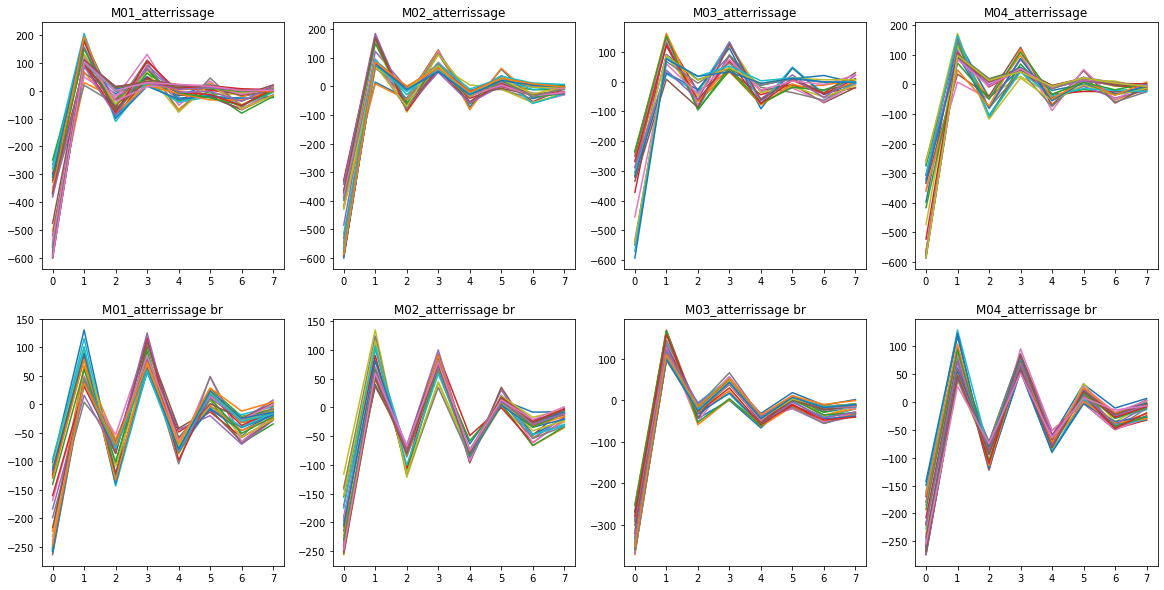

In [22]:
for action in actions[1:2]:
    for i,ID in enumerate(IDs["nonbruite"][:4]):
        y, sr = librosa.load(gen_path("nonbruite", ID, action))
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=8)
        
        plt.subplot(2,4, (i+1))
        plt.title(f'{ID}_{action}')
        plt.plot(mfcc)
        

for action in actions[1:2]:
    for i,ID in enumerate(IDs["bruite"][:4]):
        y, sr = librosa.load(gen_path("bruite", ID, action))
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=8)
        
        plt.subplot(2,4, 4+i+1)
        plt.title(f'{ID}_{action} br')
        plt.plot(mfcc)

plt.show()

### Comparer les différents coefficients du mfcc

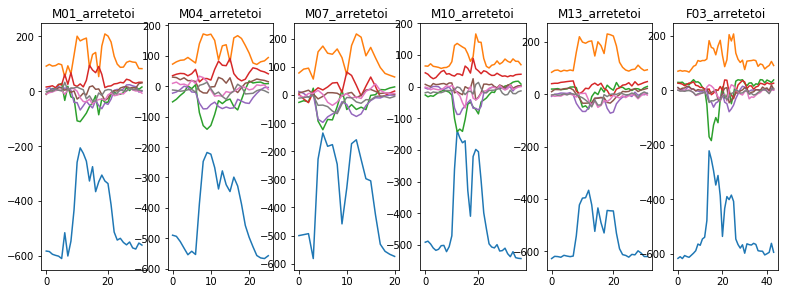

In [23]:
plt.clf()

for action in actions[:1]:
    for i,ID in enumerate(IDs_nonbruite[::3]):
        y, sr = librosa.load(gen_path("nonbruite", ID, action))
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=8)
        
        
        
        plt.subplot(2,len(IDs["nonbruite"])/2, (i+1))
        plt.title(f'{ID}_{action}')
        plt.plot(mfcc.transpose())


plt.show()

### Comparaison d'une MFCC donnée avec toutes les autres dans le but de retrouver la commande donnée initialement

#### Fonction pour la comparaison

In [24]:
def compare_mfcc(filepath):
    y_son, sr_son = librosa.load(filepath)

    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=8)

    results = []

    max_details_len = 0

    for typeSon in IDs:
        for ID in IDs[typeSon]:
            for action in actions:
                filename = gen_path(typeSon, ID, action)
                if filename != action_to_find:
                    y, sr = librosa.load(filename)

                    mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                    n_mfcc=8)

                    action_details = f"{typeSon} {action} ({ID})" 

                    if len(action_details) > max_details_len:
                        max_details_len = len(action_details)

                    results.append((action_details, DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect)))


    results.sort(key=lambda k:k[1])

    for i, (action, result) in enumerate(results):
        print(f'{i+1}:\t{action:<{max_details_len}}\t|\t{result}')
    print()

    print(f'La commande donnée est donc probablement {results[0][0].split()[1]}')


In [ ]:
action_to_find = gen_random_path("nonbruite")

print(action_to_find, end="\n\n")

compare_mfcc(action_to_find)

#### Fonction de comparaison montrant la commande la plus probable pour chaque voix

In [164]:
def compare_mfcc_voices(filepath, affichage = True):
    
    y_son, sr_son = librosa.load(filepath)

    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=8)

    results = dict()

    max_details_len = 0 
        
    for typeSon in IDs:
        for ID in IDs[typeSon]:
            dtw_min_score = 10**5
            dtw_min_action = ""

            for action in actions:
                filename = gen_path(typeSon, ID, action)
                
                if filename != filepath:
                    y, sr = librosa.load(filename)

                    mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                    n_mfcc=8)

                    action_details = f"{typeSon} {ID}"
                    action_display = action_details +" "+ action

                    if len(action_display)+1 > max_details_len:
                        max_details_len = len(action_display)

                    dtw_score = DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect)

                    if dtw_score < dtw_min_score:
                        dtw_min_score = dtw_score
                        results[action_details] = (action, dtw_min_score)
    
    if affichage:
        for key in sorted(results.keys(), key=lambda k: results[k][1]):
            action, result = results[key]
            action_dsp = f'{key}: {action}'
            print(f'{action_dsp:<{max_details_len}}\t|\t{result}')
            
    return sorted(results.keys(), key=lambda k: results[k][1])
    
   

In [ ]:
action_to_find = gen_random_path("nonbruite")

print(action_to_find, end="\n\n")

compare_mfcc_voices(action_to_find)

### Test avec le corpus de voix perso

In [ ]:
action_to_find = gen_random_path("test")

print(action_to_find, end="\n\n")

compare_mfcc(action_to_find)

In [165]:
import time


action_to_find = gen_random_path("diegob")


print(action_to_find, end="\n\n")

debut=time.time()
results = compare_mfcc_voices(action_to_find, False)
fin= time.time()
print(fin - debut)

print(results)

corpus_dgo/bruite/M21_faisunflip.wav

22.583604097366333
['diegob M21', 'diegonb M20', 'bruite M03', 'bruite M02', 'bruite M04', 'test M01', 'bruite M01', 'nonbruite M07', 'nonbruite M10', 'nonbruite M12', 'nonbruite M08', 'nonbruite M03', 'nonbruite F02', 'nonbruite M04', 'nonbruite M05', 'nonbruite M09', 'nonbruite M11', 'nonbruite F05', 'nonbruite M01', 'nonbruite F03', 'nonbruite M02', 'nonbruite F01', 'nonbruite M13', 'nonbruite F04', 'nonbruite M06']


choisir quoi comme base de référence ?

In [417]:
def compare_mfcc_to_reference(path_action_to_find, references, affichage = True):
    """
    On fixe un ensemble de fichier de référence (M01 par exemple) 
    et on donne a notre fonction une action de test (path_action_to_find).
    Cette fonction retourne les différents score de la DTW entre notre 
    action de test et les actions de notre corpus de référence.    
    
    """
    reference_typeSon, reference_ID = references
    y_son, sr_son = librosa.load(path_action_to_find)
    
    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=8)

    results = []

    max_details_len = 0 
    dtw_min_score = 10**5
    dtw_min_action = ""
    
    for action in actions:
        filename = gen_path(reference_typeSon, reference_ID, action)
        y, sr = librosa.load(filename)
        mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                    n_mfcc=8)
        action_details = f"{reference_typeSon} {reference_ID}"
        action_display = action_details +" "+ action
        dtw_score = DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect)
        results.append((action, dtw_score))
    
    return sorted(results, key=lambda x : x[1])



In [421]:
action_to_find = gen_random_path("diegonb")
print(action_to_find, end="\n\n")

z = compare_mfcc_to_reference(action_to_find, ["reference", "M01"])
df = pd.DataFrame(z, columns =['action de réference', 'score']) 
df

corpus_dgo/non_bruite/M20_droite.wav



,action de réference,score
0,gauche,83.954736
1,plusbas,85.028759
2,arretetoi,87.281811
3,plushaut,87.786035
4,avance,89.443466
5,faisunflip,93.229873
6,decollage,94.485173
7,recule,95.024652
8,etatdurgence,96.470712
9,tournegauche,96.751429


In [422]:
def get_all_actions_from_path(typeSon):
    """
    Retourne tous les fichiers d'un typeSon (['nonbruite', 'bruite', 'test', 'diegonb', 'diegob'])" 
    """
    selected_IDs = IDs[typeSon]
    return [[gen_path(typeSon, selected_IDs[j], actions[i]) for i in range(len(actions))] for j in range(len(selected_IDs))]

In [336]:
references_actions = (get_all_actions_from_path("reference"))[0] # dans le cas du corpus référence vu qu'il n'y a qu'un ID (M01 pour l'instant pas besoin de flatten la liste, il suffit de récupérer le premier élément)
for action_de_ref in references_actions:
    print(action_de_ref)
print("\n"*2)
print("--"*20)
print("\n"*2)
flatten = lambda l: [e for m in l for e in m]
references_nonbruite = flatten(get_all_actions_from_path("nonbruite"))
for action_de_nb in references_nonbruite:
    print(action_de_nb)

testdiegonb_actions = get_all_actions_from_path("diegonb")[0]


['M01']
corpus_reference/M01_arretetoi.wav
corpus_reference/M01_atterrissage.wav
corpus_reference/M01_avance.wav
corpus_reference/M01_decollage.wav
corpus_reference/M01_droite.wav
corpus_reference/M01_etatdurgence.wav
corpus_reference/M01_faisunflip.wav
corpus_reference/M01_gauche.wav
corpus_reference/M01_plusbas.wav
corpus_reference/M01_plushaut.wav
corpus_reference/M01_recule.wav
corpus_reference/M01_tournedroite.wav
corpus_reference/M01_tournegauche.wav



----------------------------------------



['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09', 'M10', 'M11', 'M12', 'M13', 'F01', 'F02', 'F03', 'F04', 'F05']
corpus/dronevolant_nonbruite/M01_arretetoi.wav
corpus/dronevolant_nonbruite/M01_atterrissage.wav
corpus/dronevolant_nonbruite/M01_avance.wav
corpus/dronevolant_nonbruite/M01_decollage.wav
corpus/dronevolant_nonbruite/M01_droite.wav
corpus/dronevolant_nonbruite/M01_etatdurgence.wav
corpus/dronevolant_nonbruite/M01_faisunflip.wav
corpus/dronevolant_nonbruite/M01_ga

In [427]:
def buildConfusionMatrix(corpus_reference = "nonbruite", corpus_test = "test",IDs_test = "M01", affichage = False):
    
    cptbonnesrep = 0
    predictions = [] 
    vraisresultats = actions
    corpusdetest = get_all_actions_from_path(corpus_test)[int(IDs_test[1:]) - 1]
    print("debut de la construction de la matrice de confusion ... \n |",end =" ")
    n = len(corpusdetest)
    for i in range(n):
        action_a_tester = corpusdetest[i]
        print(f"{i} / {n}", end=" | ")
        z = compare_mfcc_to_reference(action_a_tester, [corpus_reference, "M01"])[0]
        predictions.append(z[0])
        if z[0] == actions[i]:
            cptbonnesrep+=1
    print("fin de la construction.")
    
    if affichage:
        for j in range(n):
            print(actions[j], predictions[j])

    return confusion_matrix(actions, predictions), cptbonnesrep

def drawConfusionMatrix(confusion_matrix):
    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in actions],
                      columns = [i for i in actions])
    plt.figure(figsize=(7,7))
    sn.heatmap(df_cm, annot=True)
    print(f"Sur {len(actions)} actions testés, on a obtenu {cpt} bonnes réponses. \n SCORE = {round(cpt / len(actions),2)}%")

Matrice de confusion :

In [428]:
cfsm, cpt = buildConfusionMatrix("nonbruite", "test") # corpus de réference : "nonbruit", corpus de test : "test" 

debut de la construction de la matrice de confusion ... 
 | 0 / 13 | 1 / 13 | 2 / 13 | 3 / 13 | 4 / 13 | 5 / 13 | 6 / 13 | 7 / 13 | 8 / 13 | 9 / 13 | 10 / 13 | 11 / 13 | 12 / 13 | fin de la construction.


Sur 13 actions testés, on a obtenu 5 bonnes réponses. 
 SCORE = 0.38%


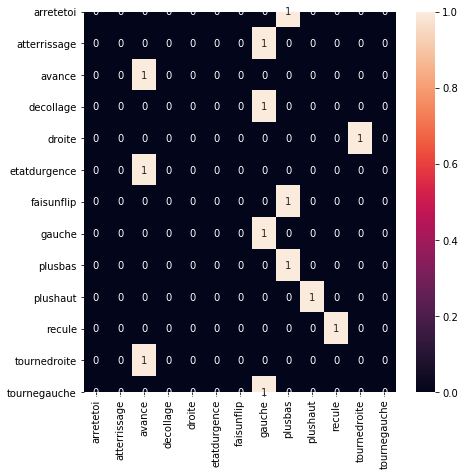

In [429]:
drawConfusionMatrix(cfsm)

debut de la construction de la matrice de confusion ... 
 | 0 / 13 | 1 / 13 | 2 / 13 | 3 / 13 | 4 / 13 | 5 / 13 | 6 / 13 | 7 / 13 | 8 / 13 | 9 / 13 | 10 / 13 | 11 / 13 | 12 / 13 | fin de la construction.
Sur 13 actions testés, on a obtenu 13 bonnes réponses. 
 SCORE = 1.0%


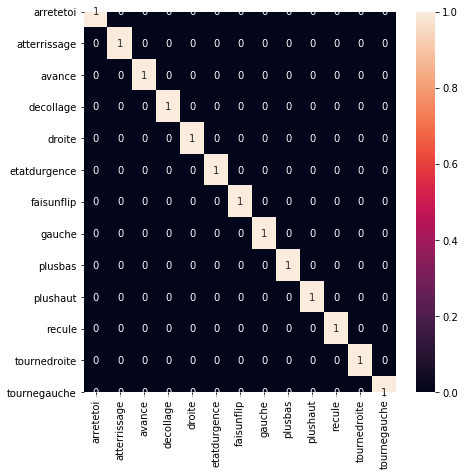

In [430]:
z, cpt = buildConfusionMatrix("reference", "reference")
drawConfusionMatrix(z)

In [432]:
cfsm, cpt = buildConfusionMatrix("nonbruite", "reference", "M02")
drawConfusionMatrix(cfsm)

IndexError: list index out of range